In [44]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('/Users/dileepsathyan/Documents/GitHub/datasets/ts_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [36]:
df1 = df.sum()
df1.head()

Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
Lat                                                         5606.38
Long                                                        6072.63
1/22/20                                                         555
1/23/20                                                         654
dtype: object

In [37]:
# Convert Series object to a proper Dataframe
df1 = pd.DataFrame(df1).reset_index()
df1.head()

,index,0
0,Country/Region,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1,Lat,5606.38
2,Long,6072.63
3,1/22/20,555
4,1/23/20,654


In [38]:
# Rename the columns with apropriate names
df1.rename(columns = {'index':'Date', 0:'Covid_Cases'}, inplace = True)

# Remove the first row and save the rest of the dataframe
df1 = df1[3:].reset_index(drop=True)
df1.head()

,Date,Covid_Cases
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [39]:
# Check the datatypes in the dataframe and also look for any NULL values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         188 non-null    object
 1   Covid_Cases  188 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [40]:
# Convert to the appropriate datatypes
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Covid_Cases"] = df1["Covid_Cases"].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         188 non-null    datetime64[ns]
 1   Covid_Cases  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [42]:
df1.head()

,Date,Covid_Cases
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


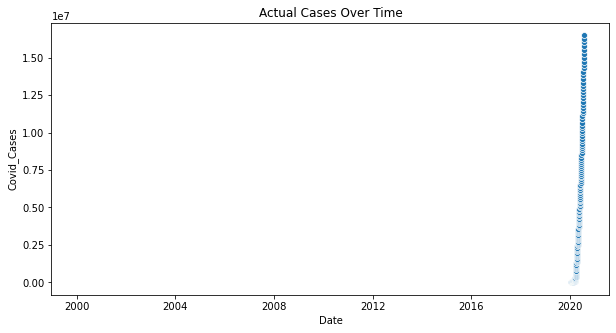

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(df1["Date"], df1["Covid_Cases"])
plt.title('Actual Cases Over Time')
plt.show()